In [1]:
import os
# root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left_with_mass_centroid"
# mask_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left"
# check_outputs =  "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\left_with_mass_centroid_Check"

root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right_with_mass_centroid"
mask_root = "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right"
check_outputs =  "E:\\dataset\\SublingualVein\\TIASRGB2020\\train_left_right_binary_label\\right_with_mass_centroid_Check"
# csv_name = "train_left.csv"
csv_name = "train_right.csv"
desired_size = 224
csv_path = os.path.join(root, csv_name)
print("csv_path:", csv_path)

csv_path: E:\dataset\SublingualVein\TIASRGB2020\train_left_right_binary_label\right_with_mass_centroid\train_right.csv


In [2]:
import csv

In [3]:
from numpy import genfromtxt
import numpy as np
# my_data = genfromtxt(csv_path, delimiter=',') # By default, np.genfromtxt uses dtype=float: that's why you string columns are converted to
# filenames = np.genfromtxt(csv_path, delimiter=',', usecols=0, dtype=str, names=True)
# raw_data = np.genfromtxt(csv_path, delimiter=',' , names=True)
import pandas as pd
df=pd.read_csv(csv_path, sep=',',header=None)
saved_data = df.values


(220, 3)
[['fileNames' 'Cy' 'Cx']
 ['1002dozono01 (1).png' '0.46336603310852237' '0.5545677498467197']
 ['1002dozono01 (10).png' '0.44446044546851' '0.5647561443932412']
 ['1002dozono01 (2).png' '0.474548969072165' '0.5218151693667158']
 ['1002dozono01 (3).png' '0.4635484927916121' '0.4888597640891219']
 ['1002dozono01 (4).png' '0.4530140094711918' '0.5538427387529598']
 ['1002dozono01 (5).png' '0.4526086087420043' '0.556703091684435']
 ['1002dozono01 (6).png' '0.4643875611080935' '0.5326249321021185']
 ['1002dozono01 (7).png' '0.46076127819548873' '0.6097568139097744']
 ['1002dozono01 (8).png' '0.45535714285714285' '0.5837662337662337']
 ['1002dozono01 (9).png' '0.46852240896358543' '0.5828781512605042']
 ['Seki_0.png' '0.41668624686716793' '0.49743499373433586']
 ['Seki_01a1.png' '0.42332913455838767' '0.4445391227030231']
 ['Seki_01a10.png' '0.43439702114029466' '0.5504083920563742']
 ['Seki_01a2.png' '0.4312660875160875' '0.528655888030888']
 ['Seki_01a3.png' '0.41002415458937197' 

E:\Projects\Intepreters\Anaconda\envs\TF21\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


21
centorids_y: 97.53488372093024
centroids_x: 111.59302325581395
22
centorids_y: 93.34677419354838
centroids_x: 108.40322580645162
23
centorids_y: 95.02760736196319
centroids_x: 118.59815950920246
24
centorids_y: 96.5343137254902
centroids_x: 111.67647058823529
25
centorids_y: 96.81884057971014
centroids_x: 120.73913043478261
26
centorids_y: 96.15354330708661
centroids_x: 120.9488188976378
27
centorids_y: 94.74144486692015
centroids_x: 116.35741444866922
28
centorids_y: 96.26808510638298
centroids_x: 134.86808510638298
29
centorids_y: 97.58156028368795
centroids_x: 125.84397163120566
30
centorids_y: 98.81318681318682
centroids_x: 123.5164835164835
31
centorids_y: 110.83673469387755
centroids_x: 148.25850340136054
32
centorids_y: 103.37068965517241
centroids_x: 129.0905172413793
33
centorids_y: 108.96794871794872
centroids_x: 116.8301282051282
34
centorids_y: 100.9874686716792
centroids_x: 133.31578947368422
35
centorids_y: 99.92494481236203
centroids_x: 143.05298013245033
36
centorids

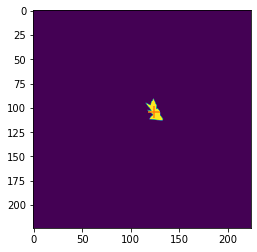

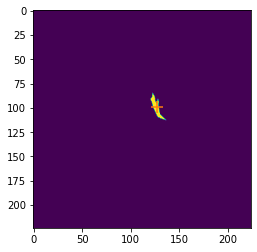

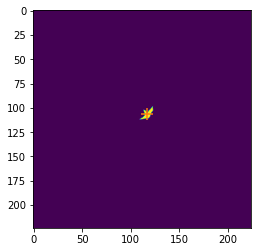

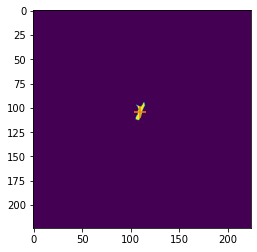

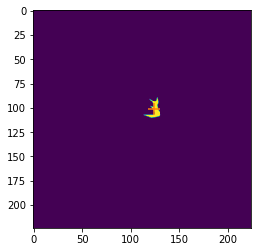

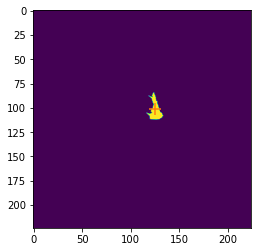

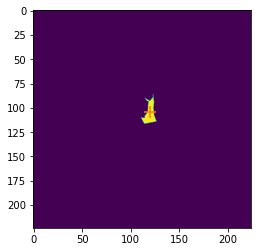

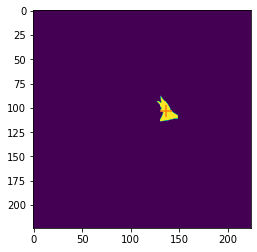

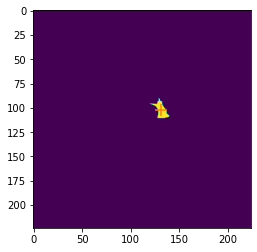

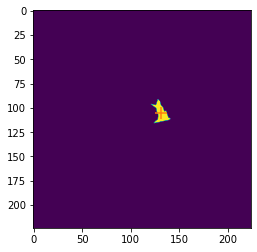

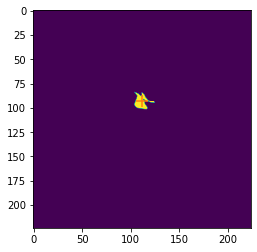

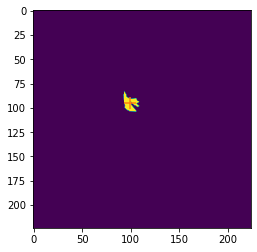

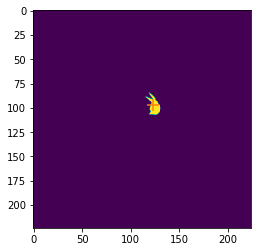

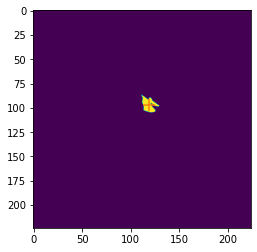

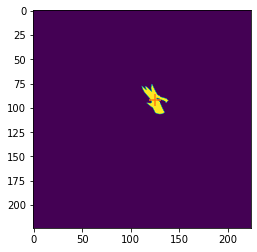

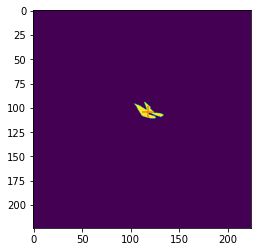

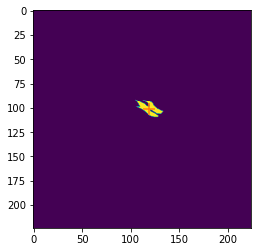

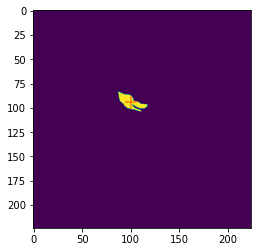

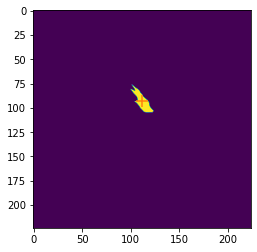

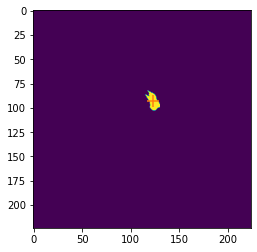

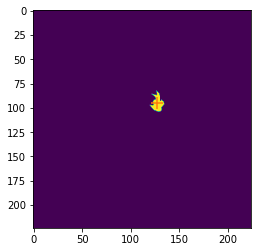

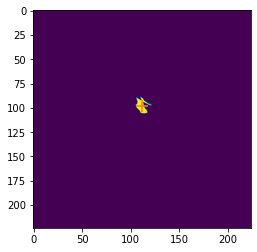

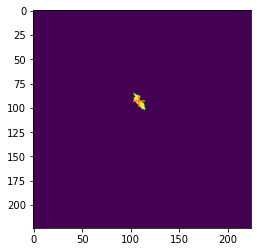

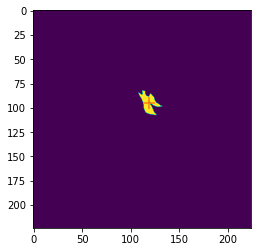

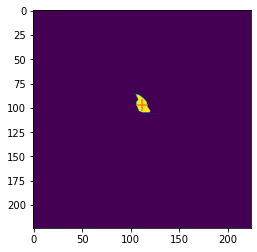

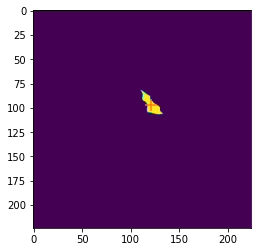

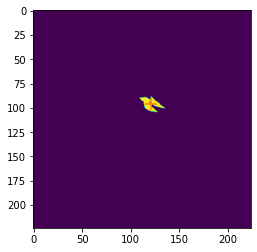

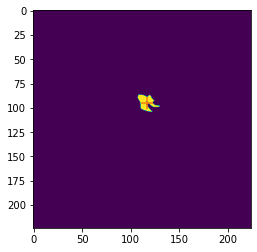

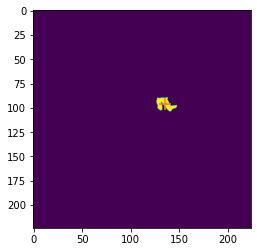

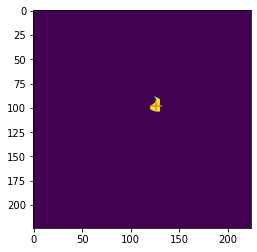

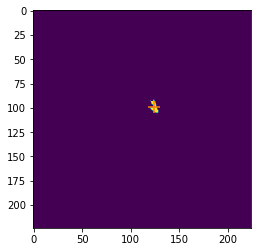

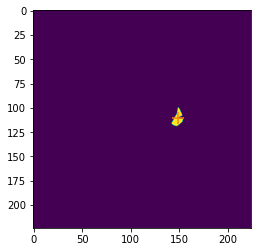

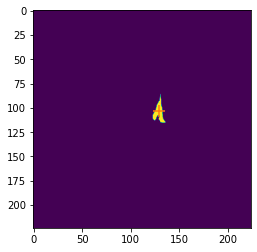

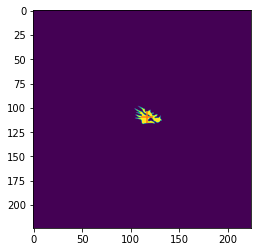

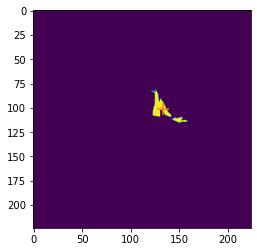

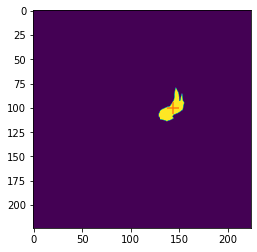

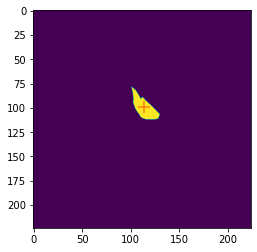

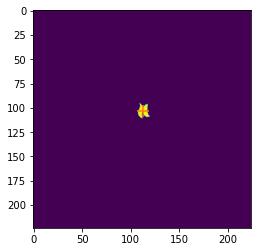

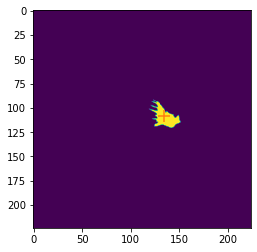

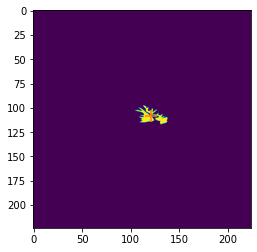

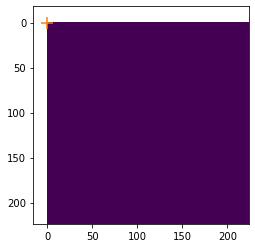

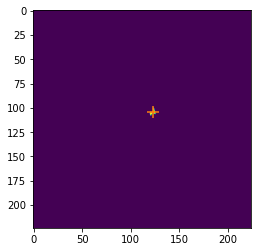

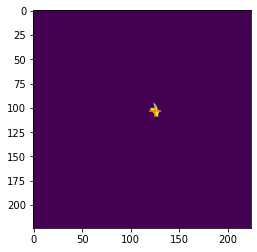

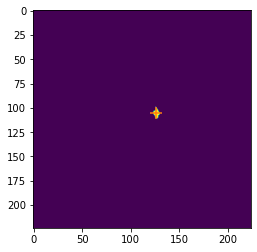

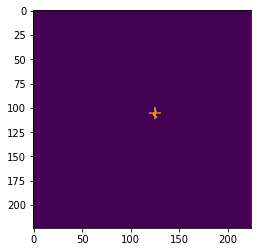

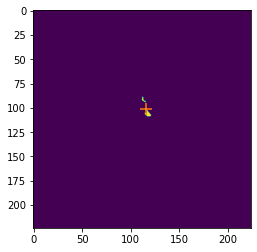

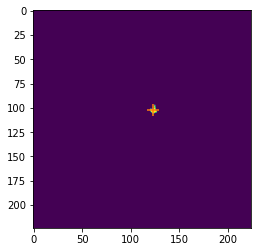

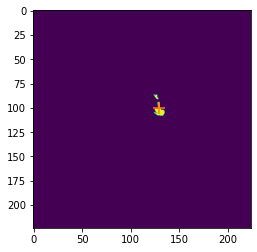

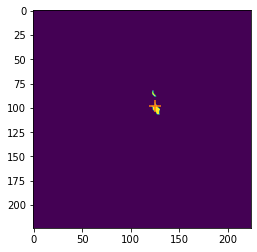

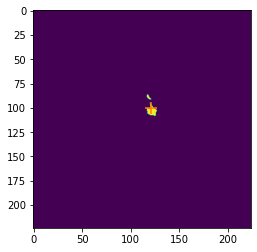

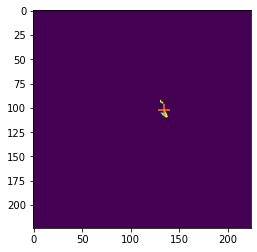

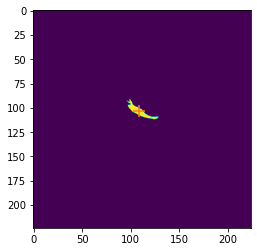

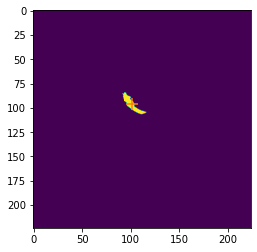

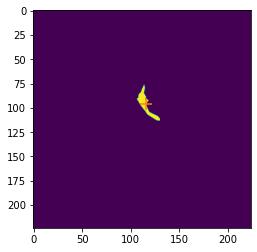

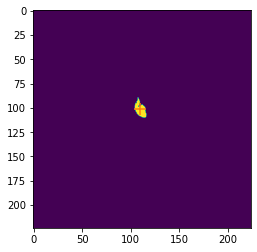

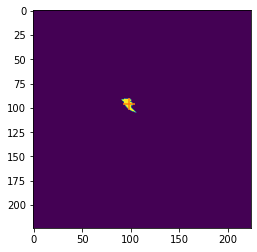

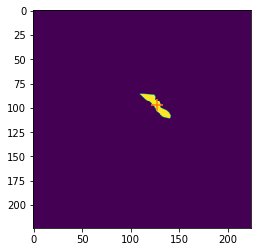

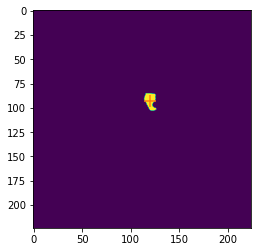

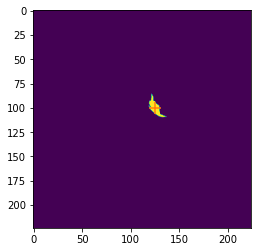

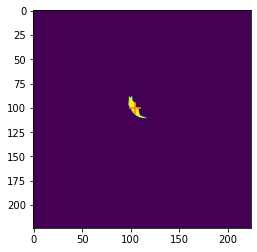

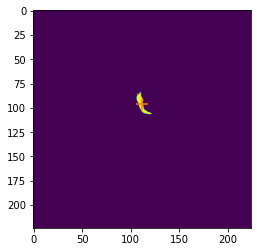

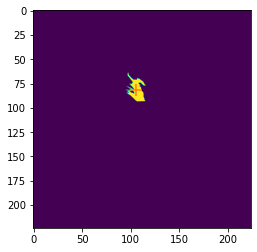

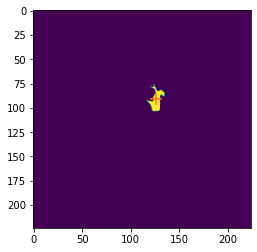

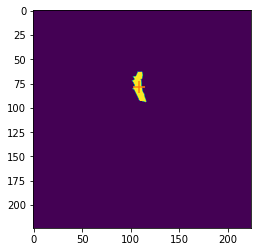

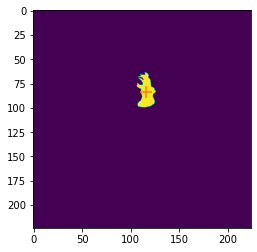

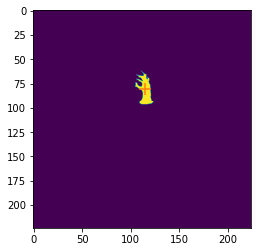

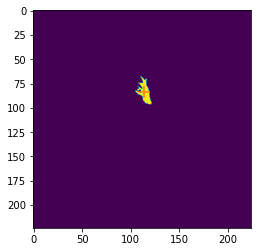

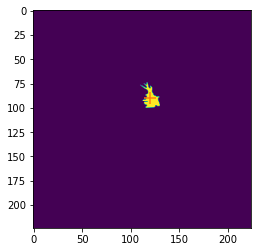

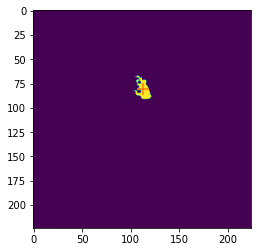

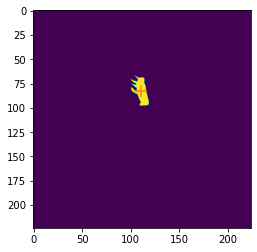

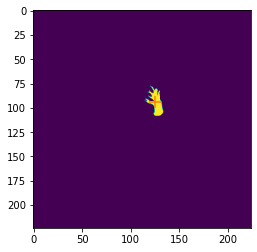

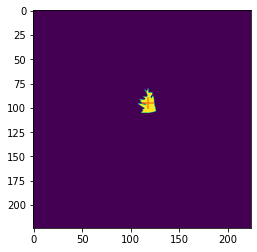

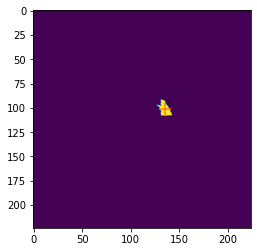

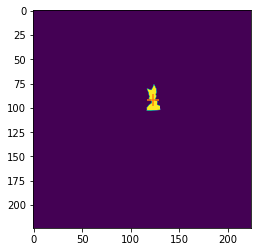

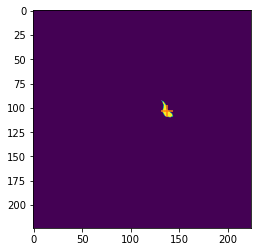

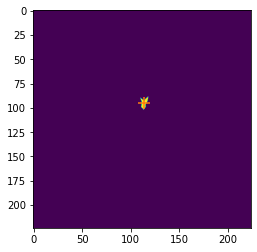

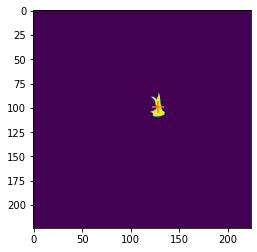

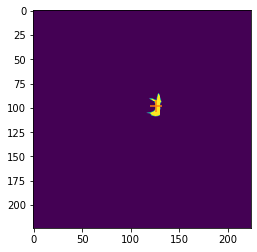

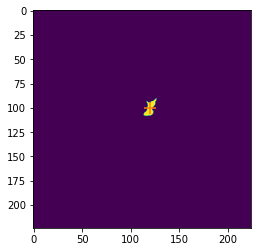

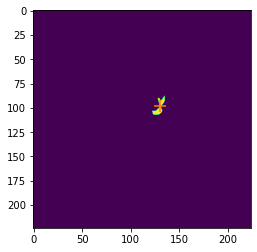

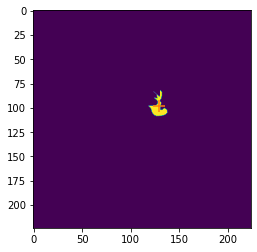

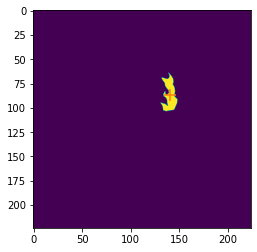

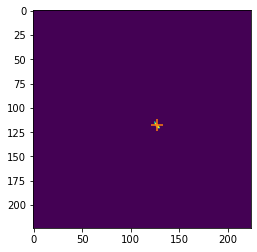

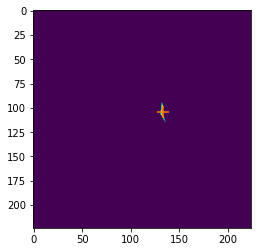

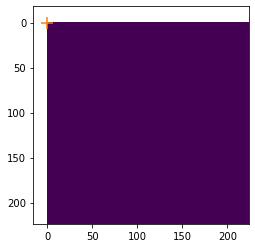

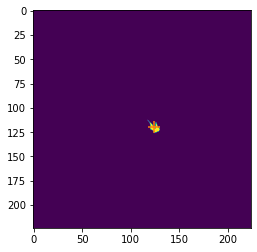

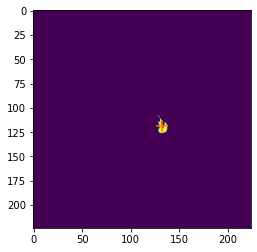

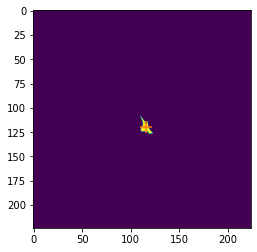

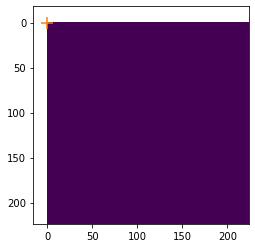

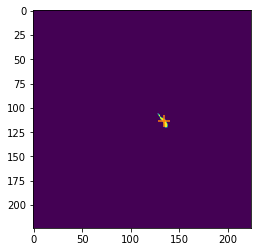

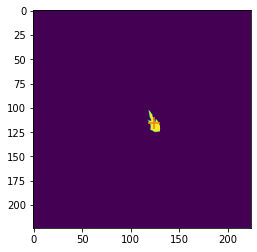

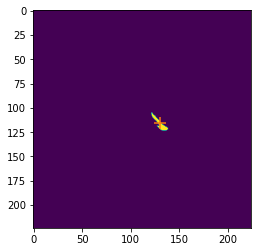

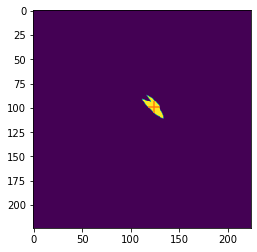

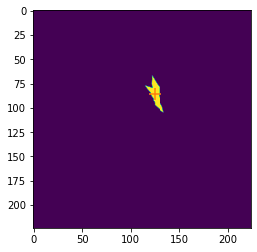

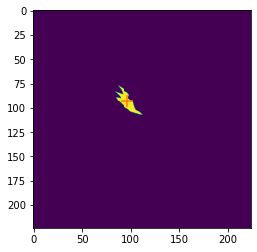

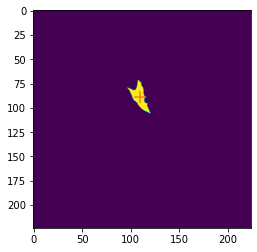

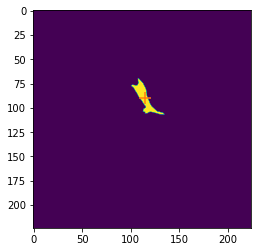

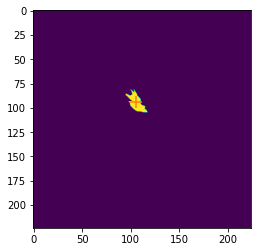

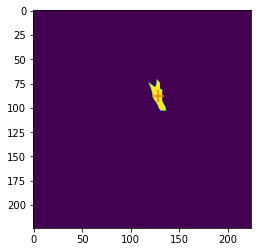

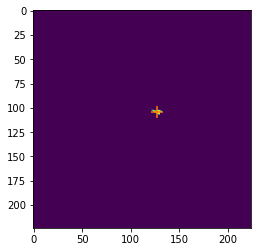

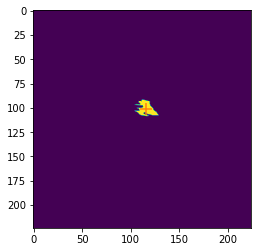

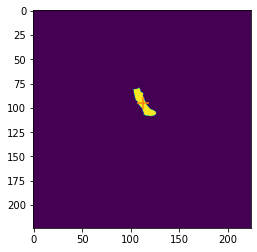

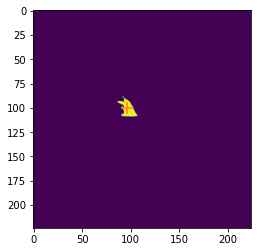

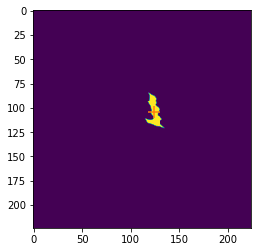

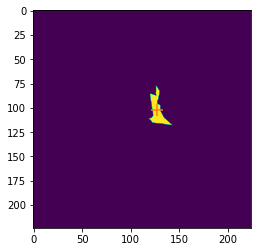

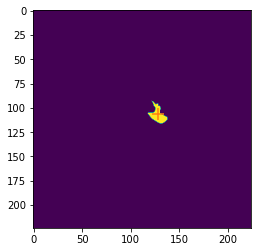

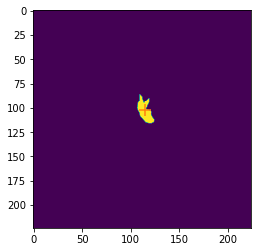

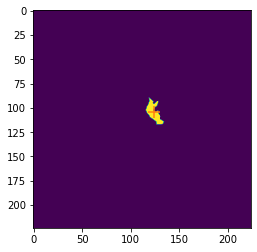

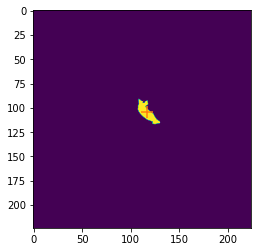

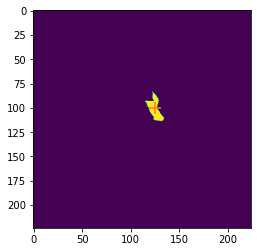

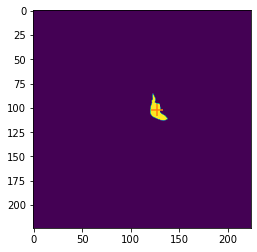

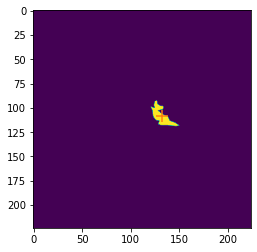

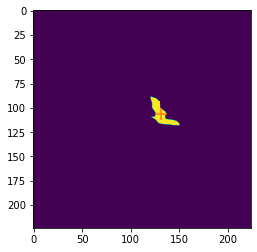

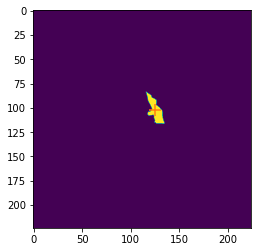

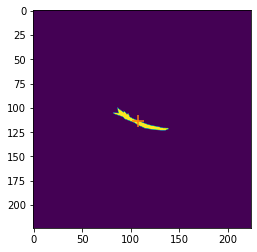

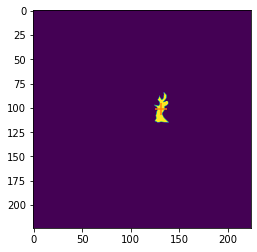

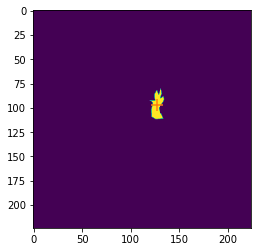

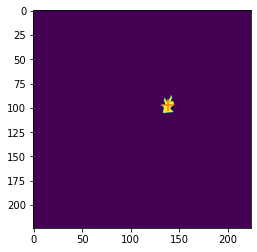

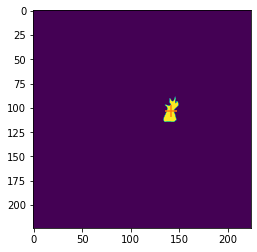

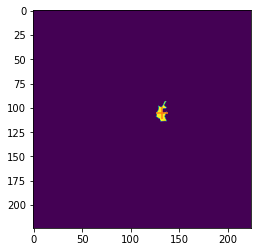

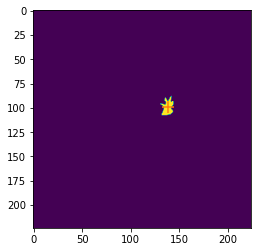

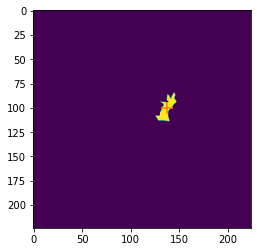

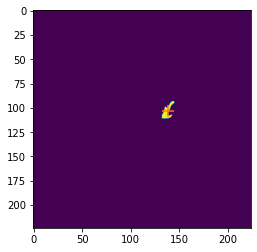

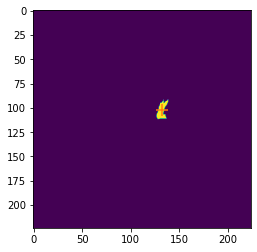

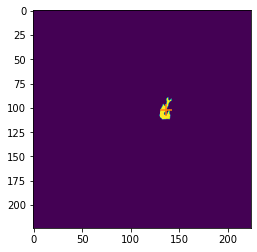

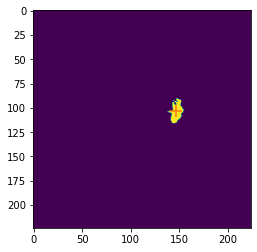

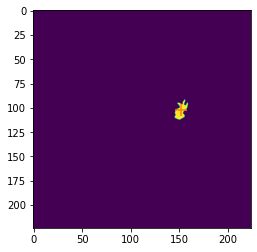

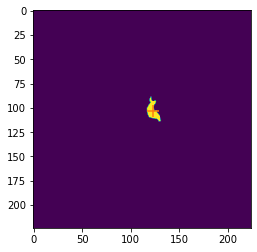

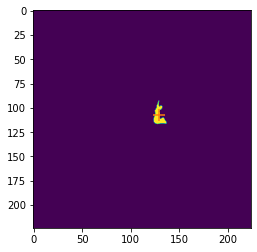

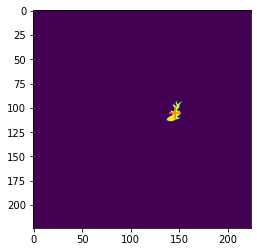

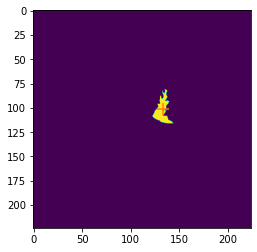

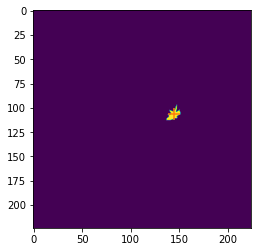

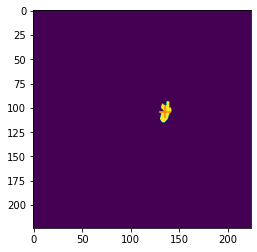

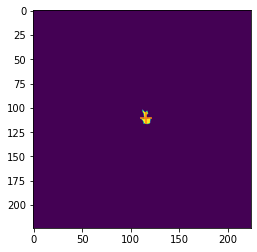

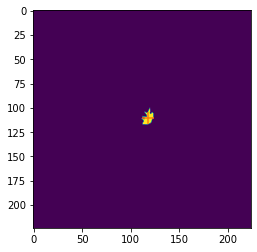

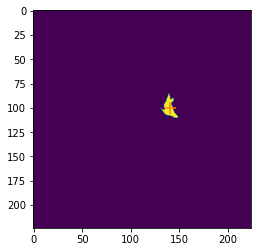

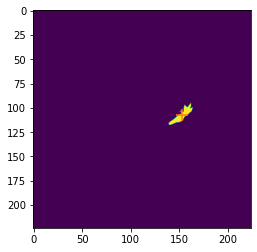

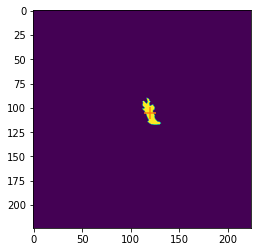

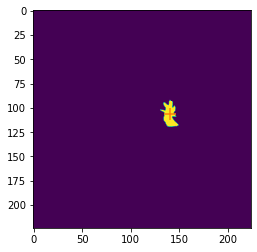

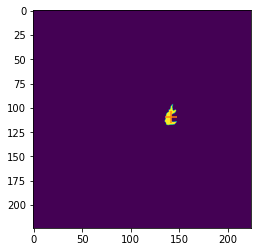

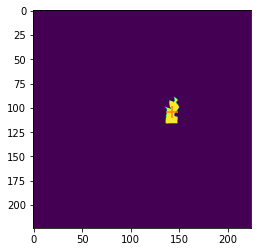

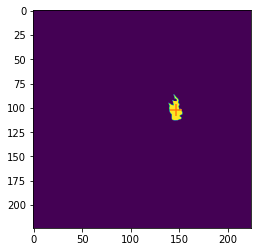

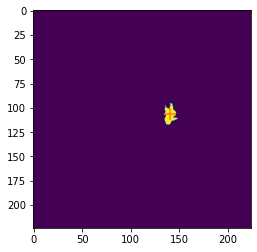

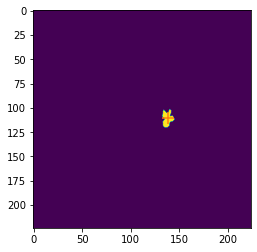

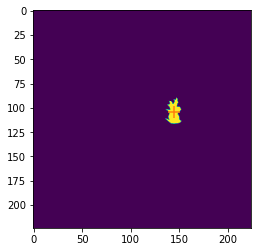

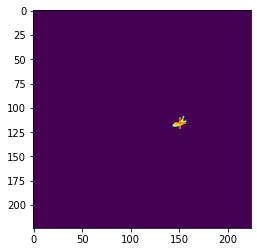

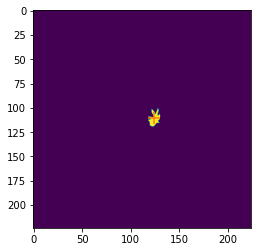

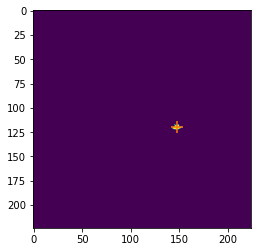

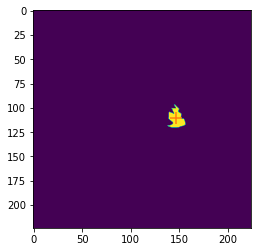

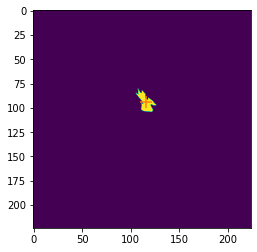

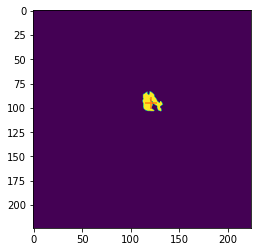

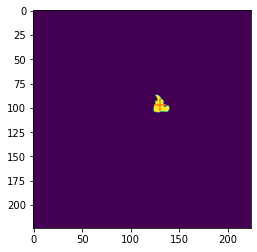

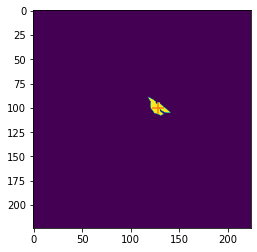

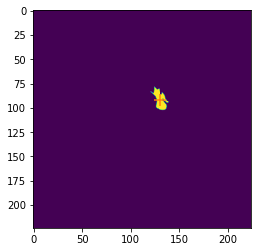

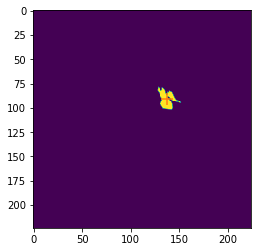

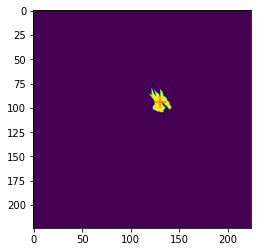

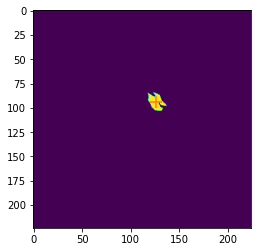

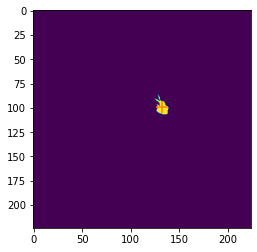

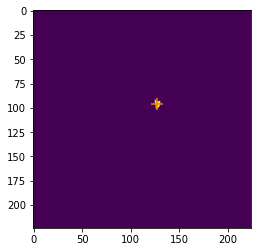

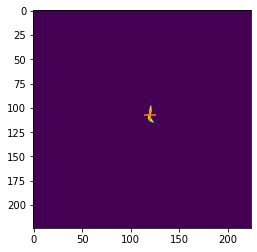

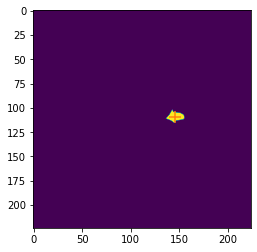

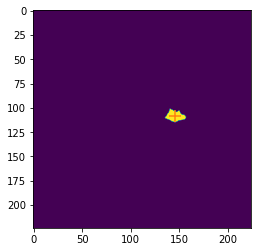

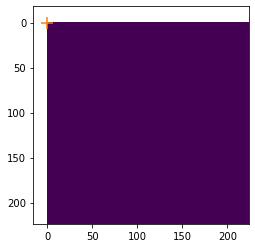

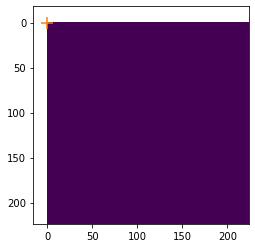

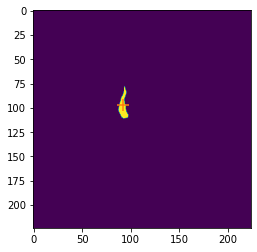

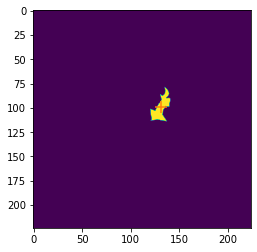

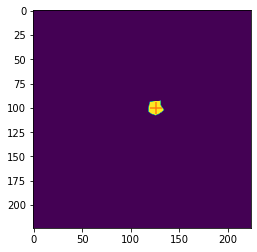

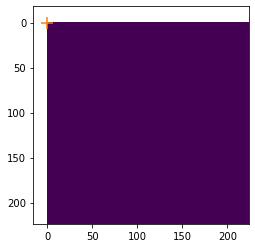

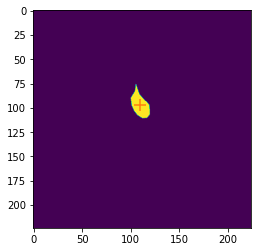

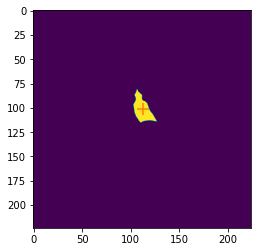

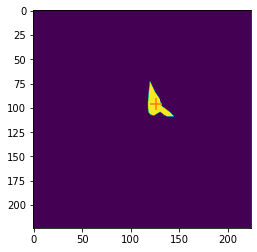

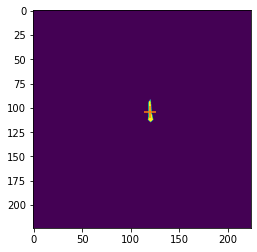

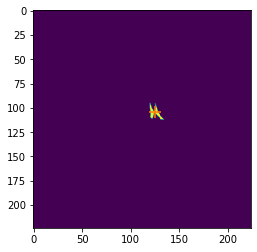

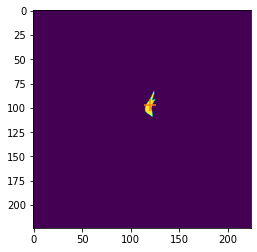

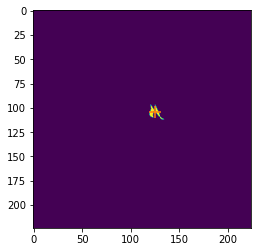

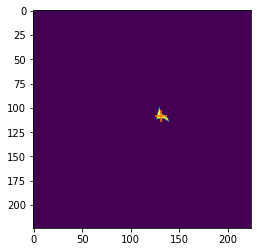

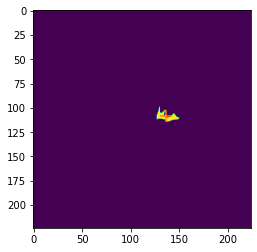

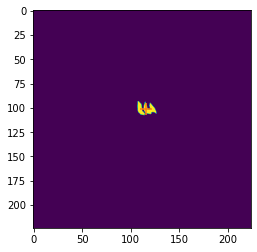

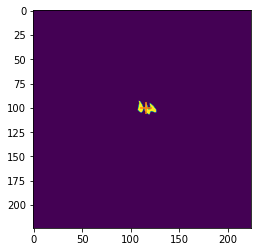

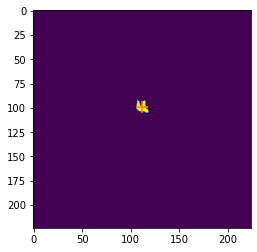

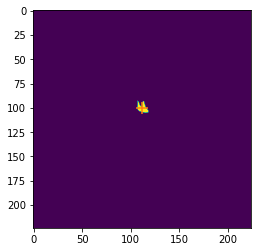

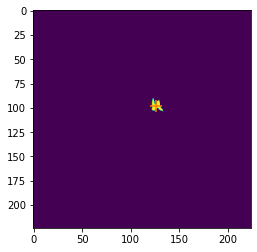

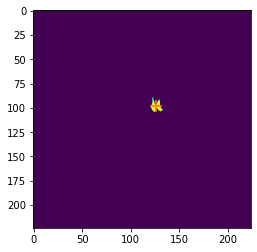

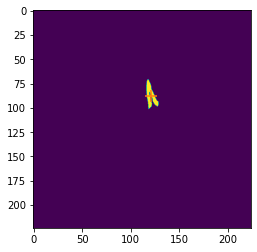

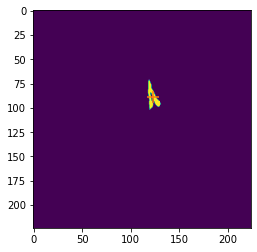

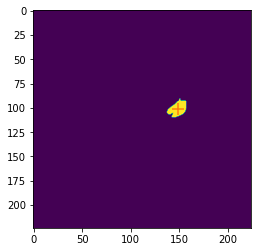

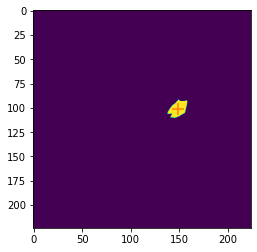

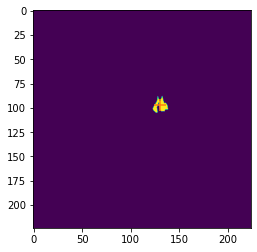

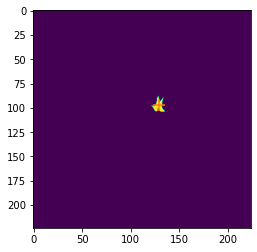

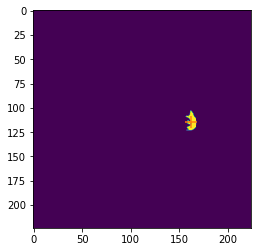

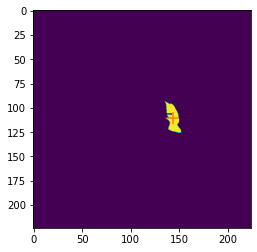

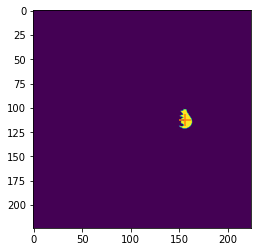

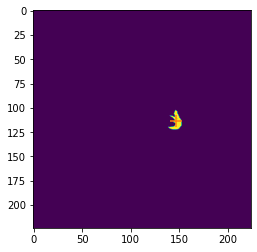

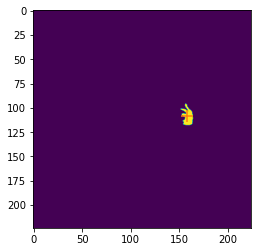

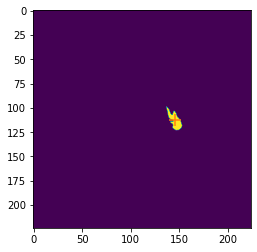

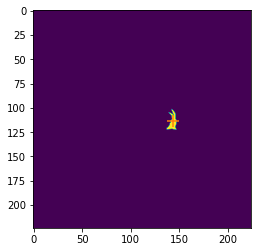

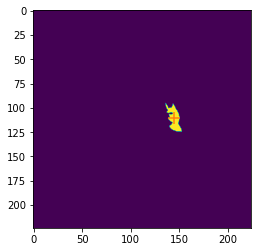

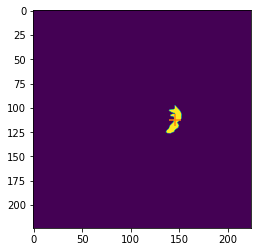

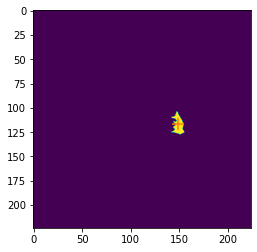

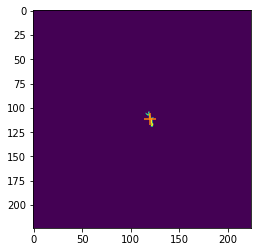

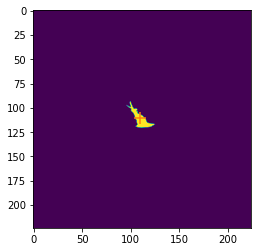

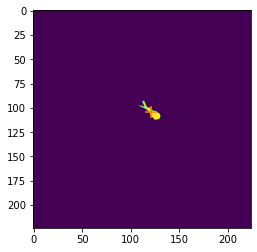

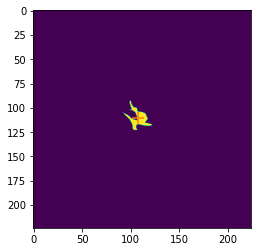

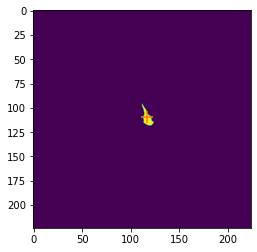

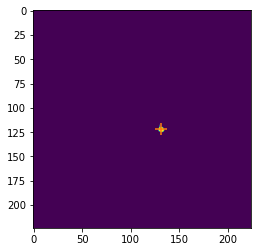

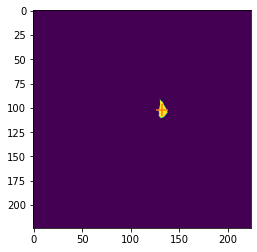

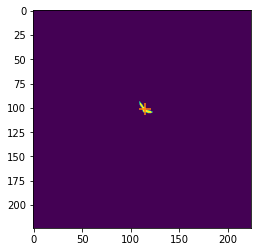

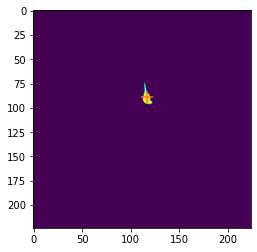

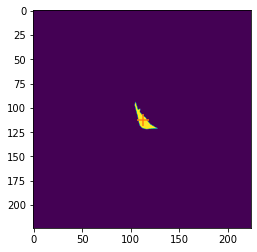

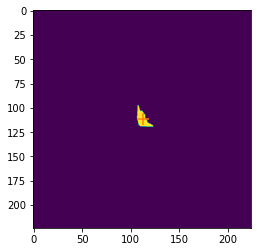

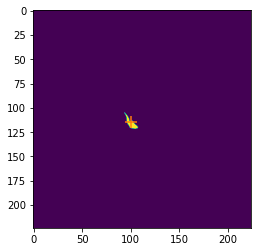

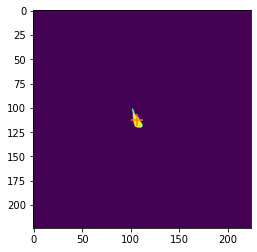

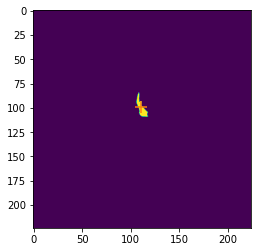

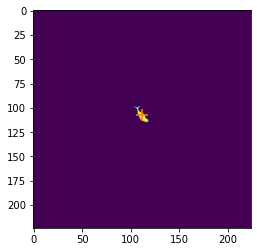

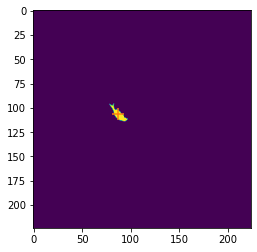

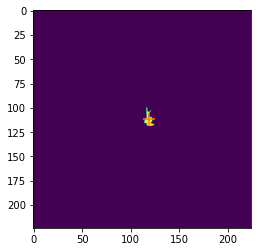

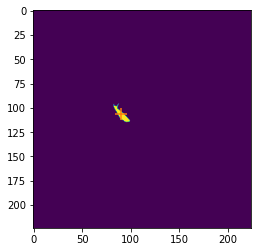

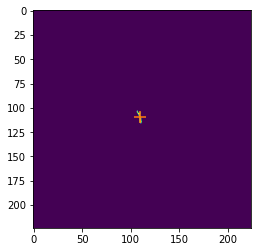

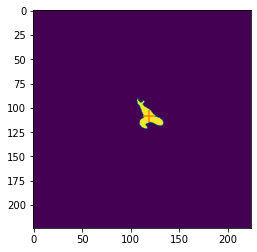

In [4]:
print(saved_data.shape)
print(saved_data)
from PIL import Image
import matplotlib.pyplot as plt
for i in range(1, saved_data.shape[0]):
    mask_path =  os.path.join(mask_root, saved_data[i,0])
    Cy =  float(saved_data[i,1])
    Cx =  float(saved_data[i,2])
    centorids_y= Cy*224
    print("centorids_y:", centorids_y)
    centroids_x =  Cx*224
    print("centroids_x:", centroids_x)
    mask = np.array(Image.open(mask_path).convert('L').resize((desired_size, desired_size)))
    fig, ax = plt.subplots()
    ax.imshow(mask)
    output_check_path = os.path.join(check_outputs, saved_data[i,0])
    ax.scatter(centroids_x, centorids_y, s=160, c='C1', marker='+')
    fig.savefig(output_check_path, dpi=300, transparent=False, bbox_inches='tight') 
    print(i)